<a href="https://colab.research.google.com/github/ucfilho/Vinicius_Air/blob/main/Time_Series/Time_Series_Air_ago_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# check prophet version
import fbprophet
import pandas as pd
# print version number
print('Prophet %s' % fbprophet.__version__)


Prophet 0.7.1


In [2]:
!git clone https://github.com/ucfilho/Vinicius_Air
%cd Vinicius_Air

fatal: destination path 'Vinicius_Air' already exists and is not an empty directory.
/content/Vinicius_Air


In [3]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
name= 'Planilha completa mestrado.xlsx'
df = pd.read_excel(name)
# plot the time series
df.head(3)

,DATA,Precipitação (mm),P atm (mB),Temp. ar (ºC),Um. rel. ar (%),População,Veículos,PTS,MP10,O3
0,1/2003,NaN,NaN,NaN,NaN,556254.299669,71723.281054,NaN,NaN,NaN
1,2/2003,NaN,NaN,NaN,NaN,557011.709545,74999.467405,NaN,NaN,NaN
2,3/2003,0.282308,917.201154,22.635385,76.388462,557768.292058,78263.122785,68.755,33.26,NaN


In [4]:
from pandas import to_datetime
from fbprophet import Prophet
columns_name = ['DATA', 'PTS']
df = df[columns_name]
df.head(3)

,DATA,PTS
0,1/2003,NaN
1,2/2003,NaN
2,3/2003,68.755


In [5]:
df.shape

(228, 2)

In [6]:
df = df.dropna()
df.tail(10)

,DATA,PTS
178,11/2017,55.710896
179,12/2017,18.374293
180,1/2018,25.316619
209,6/2020,88.091730
210,7/2020,74.194190
211,8/2020,80.175515
216,1/2021,54.168978
217,2/2021,39.611076
218,3/2021,49.191477
219,4/2021,63.342564


In [7]:
df.shape

(139, 2)

In [8]:
df['DATA']= to_datetime(df['DATA'])
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2014-01-01  61.643335   -7.900664  130.563048
1 2014-02-01  57.486254  -10.727329  125.728924
2 2014-03-01  70.047074    3.671738  138.401386
3 2014-04-01  77.878782   11.206994  149.989250
4 2014-05-01  98.796180   30.178987  163.066398


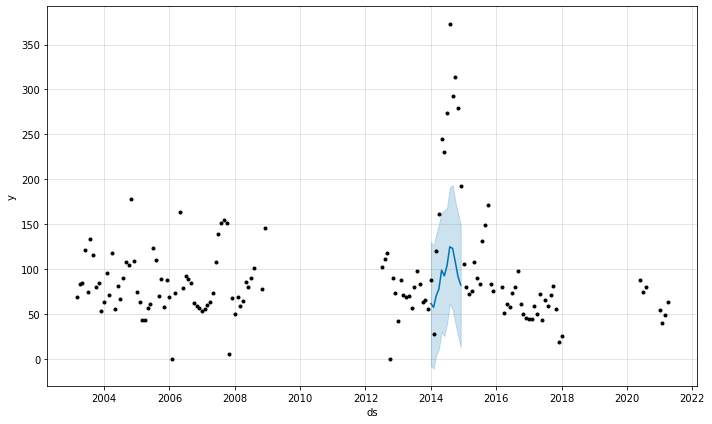

In [9]:
# define the period for which we want a prediction
from matplotlib import pyplot
from pandas import DataFrame

future = list()
for i in range(1, 13):
	date = '2014-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()